In [1]:
import pandas as pd
import geopandas as gpd
import fiona #공간데이터를 딕셔너리 등 형태로 접근가능
import matplotlib.pyplot as plt

In [151]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시
from IPython.display import display #print가 아닌 display()로 연속 출력
from IPython.display import HTML #출력 결과를 HTML로 생성

# 좌표계 정의/변환용 라이브러리
import pyproj
from fiona.crs import from_epsg

## cctv 파일 불러오기

In [152]:
df_cctv = pd.read_csv('D:/geopandas기초/마포구cctv_안심이.csv',encoding='cp949')
df_cctv.head()

,자치구,안심 주소,CCTV 용도,위도,경도,CCTV 수량,수정 일시
0,마포구,방범-관광안내소4,방범-관광안내소4,37.5565,126.9261,1,2022-12-01
1,마포구,방범001-환일길 27,방범001-환일길 27,37.5559,126.9607,1,2022-12-01
2,마포구,방범137-신수로 25,방범137-신수로 25,37.5439,126.9340,1,2022-12-01
3,마포구,방범426-신촌로 190-6,방범426-신촌로 190-6,37.5566,126.9473,1,2022-12-01
4,마포구,방범427-독막로 289,방범427-독막로 289,37.5451,126.9460,1,2022-12-01


In [153]:
df_cctv.shape #2450 rows, 8 columns

(2450, 7)

In [154]:
df_cctv.isnull().sum() # null값 체크

자치구        0
안심 주소      0
CCTV 용도    0
위도         0
경도         0
CCTV 수량    0
수정 일시      0
dtype: int64

In [155]:
# 좌표값 없는 데이터 제거
#df_cctv[['위도','경도']].dropna() 

## geojson 불러오기 - geopandas

- 원하는 지역이 없을 경우 geopandas 사용해서 전체 geojson 지도 - 원하는 지역으로 자르기

In [156]:
geo = gpd.read_file('D:/geopandas기초/HangJeongDong_ver20220701.geojson')
geo.head()

,OBJECTID,adm_nm,adm_cd,adm_cd2,sgg,sido,sidonm,sggnm,adm_cd8,geometry
0,1,서울특별시 종로구 사직동,1101053,1111053000,11110,11,서울특별시,종로구,11010530,"MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..."
1,2,서울특별시 종로구 삼청동,1101054,1111054000,11110,11,서울특별시,종로구,11010540,"MULTIPOLYGON (((126.98269 37.59507, 126.98337 ..."
2,3,서울특별시 종로구 부암동,1101055,1111055000,11110,11,서울특별시,종로구,11010550,"MULTIPOLYGON (((126.97585 37.59656, 126.97359 ..."
3,4,서울특별시 종로구 평창동,1101056,1111056000,11110,11,서울특별시,종로구,11010560,"MULTIPOLYGON (((126.97507 37.63139, 126.97649 ..."
4,5,서울특별시 종로구 무악동,1101057,1111057000,11110,11,서울특별시,종로구,11010570,"MULTIPOLYGON (((126.96067 37.58080, 126.96281 ..."


In [157]:
geo['dong'] = geo['adm_nm'].str.replace('서울특별시 마포구','')

<AxesSubplot:>

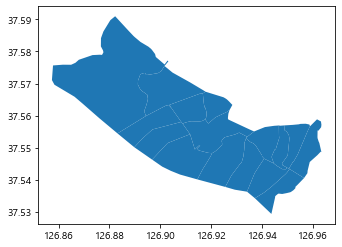

In [176]:
# 마포구만 뽑아냄
mapogu = geo[geo['sggnm']=='마포구']
mapo_geo = mapogu[['geometry','dong']]
mapo_geo.plot()

In [177]:
mapogu.columns

Index(['OBJECTID', 'adm_nm', 'adm_cd', 'adm_cd2', 'sgg', 'sido', 'sidonm',
       'sggnm', 'adm_cd8', 'geometry', 'dong'],
      dtype='object')

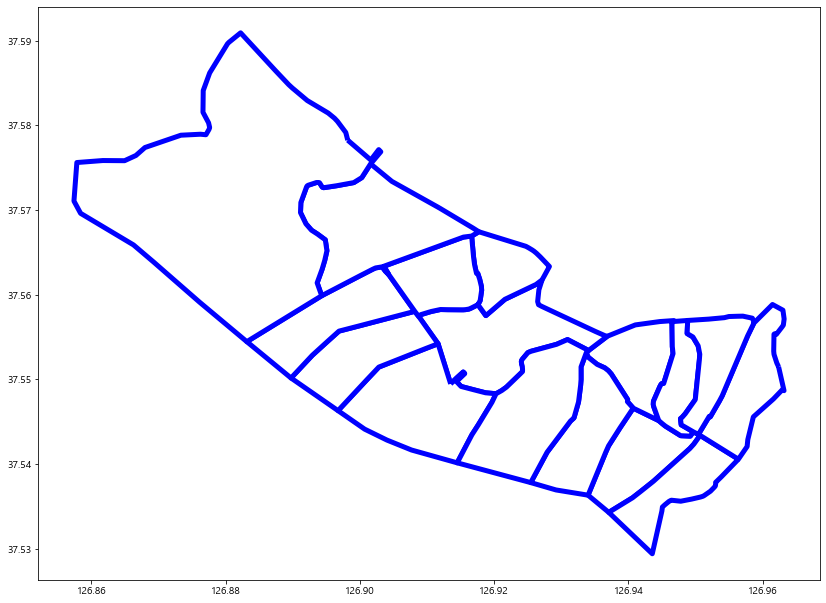

In [178]:
mapo_geo.plot(color='white', edgecolor='blue', linewidth=5,figsize=(14,18))
plt.show()
# color 배경색
# edgecolor 선 색
# linewidth 선 굵기
# figsize 크기

- cctv 위경도를 Point 형식으로 변환해야함
> MULTIPOLYGON (((126.97689 37.57565, 126.97703 ..

In [179]:
#속성정보 붙임
gdf_cctv = gpd.GeoDataFrame(df_cctv, geometry=gpd.points_from_xy(df_cctv['경도'],df_cctv['위도']), crs=from_epsg(4326))
gdf_cctv.head()

,자치구,안심 주소,CCTV 용도,위도,경도,CCTV 수량,수정 일시,geometry
0,마포구,방범-관광안내소4,방범-관광안내소4,37.5565,126.9261,1,2022-12-01,POINT (126.92610 37.55650)
1,마포구,방범001-환일길 27,방범001-환일길 27,37.5559,126.9607,1,2022-12-01,POINT (126.96070 37.55590)
2,마포구,방범137-신수로 25,방범137-신수로 25,37.5439,126.9340,1,2022-12-01,POINT (126.93400 37.54390)
3,마포구,방범426-신촌로 190-6,방범426-신촌로 190-6,37.5566,126.9473,1,2022-12-01,POINT (126.94730 37.55660)
4,마포구,방범427-독막로 289,방범427-독막로 289,37.5451,126.9460,1,2022-12-01,POINT (126.94600 37.54510)


In [180]:
gdf_cctv.crs # crs 확인

<Geographic 2D CRS: +init=epsg:4326 +no_defs +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [181]:
# sample
out = gdf_cctv.iloc[:10]

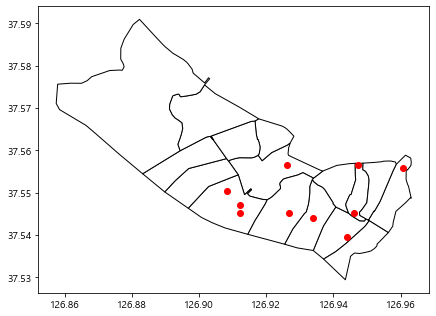

In [182]:
plt.rcParams['font.family']='Malgun Gothic' #한글 폰트

ax = mapo_geo.plot(color='white',edgecolor='black',figsize=(7,7)) #지도 불러오기
out.plot(ax = ax,color='red') #점 불러오기
plt.show()

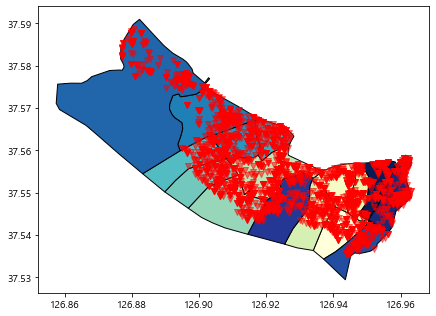

In [183]:
ax = mapo_geo.plot(color='white',edgecolor='black',figsize=(7,7),cmap='YlGnBu') #지도 불러오기
gdf_cctv.plot(ax = ax,color='red',alpha=0.5,marker='v') #점 불러오기
plt.show()

## 마포구 존재하는 동 확인

In [184]:
# 동 확인
mapogu['adm_nm'].value_counts()

서울특별시 마포구 용강동     1
서울특별시 마포구 대흥동     1
서울특별시 마포구 염리동     1
서울특별시 마포구 신수동     1
서울특별시 마포구 서교동     1
서울특별시 마포구 합정동     1
서울특별시 마포구 망원1동    1
서울특별시 마포구 망원2동    1
서울특별시 마포구 연남동     1
서울특별시 마포구 성산1동    1
서울특별시 마포구 성산2동    1
서울특별시 마포구 상암동     1
서울특별시 마포구 도화동     1
서울특별시 마포구 서강동     1
서울특별시 마포구 공덕동     1
서울특별시 마포구 아현동     1
Name: adm_nm, dtype: int64

In [185]:
mapo_geo['dong'] = mapo_geo['dong'].astype(str)

In [187]:
mapo_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16 entries, 206 to 221
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  16 non-null     geometry
 1   dong      16 non-null     object  
 2   coords    16 non-null     object  
dtypes: geometry(1), object(2)
memory usage: 512.0+ bytes
